## 1.Environment Setup

In [ ]:
import os
import json
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer, MinMaxScaler

# Đặt seed để đảm bảo nhất quán giữa các lần chạy
os.environ["PYTHONHASHSEED"] = "42"
np.random.seed(42)
random.seed(42)
print("Seed: 42")

Seed: 42


## 2.Data Processing

In [ ]:
# https://drive.google.com/file/d/16HPyuXWXPptt5g3xvS_kR_wXAfjpR1Ju/view?usp=sharing
!gdown 16HPyuXWXPptt5g3xvS_kR_wXAfjpR1Ju

Downloading...
From: https://drive.google.com/uc?id=16HPyuXWXPptt5g3xvS_kR_wXAfjpR1Ju
To: /content/cleveland.csv
100% 10.9k/10.9k [00:00<00:00, 22.1MB/s]


In [ ]:
DATA_PATH = 'cleveland.csv'
COLUMNS = ['age','sex','cp','trestbps','chol','fbs','restecg',
           'thalach','exang','oldpeak','slope','ca','thal','target']

raw = pd.read_csv(DATA_PATH, header=None)
raw.columns = COLUMNS

for c in ['age','trestbps','chol','thalach','oldpeak','ca','thal']:
    raw[c] = pd.to_numeric(raw[c], errors='coerce')

raw['target'] = (raw['target'] > 0).astype(int)
print("Shape:", raw.shape)
display(raw.head())
display(raw.isna().sum())

Shape: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


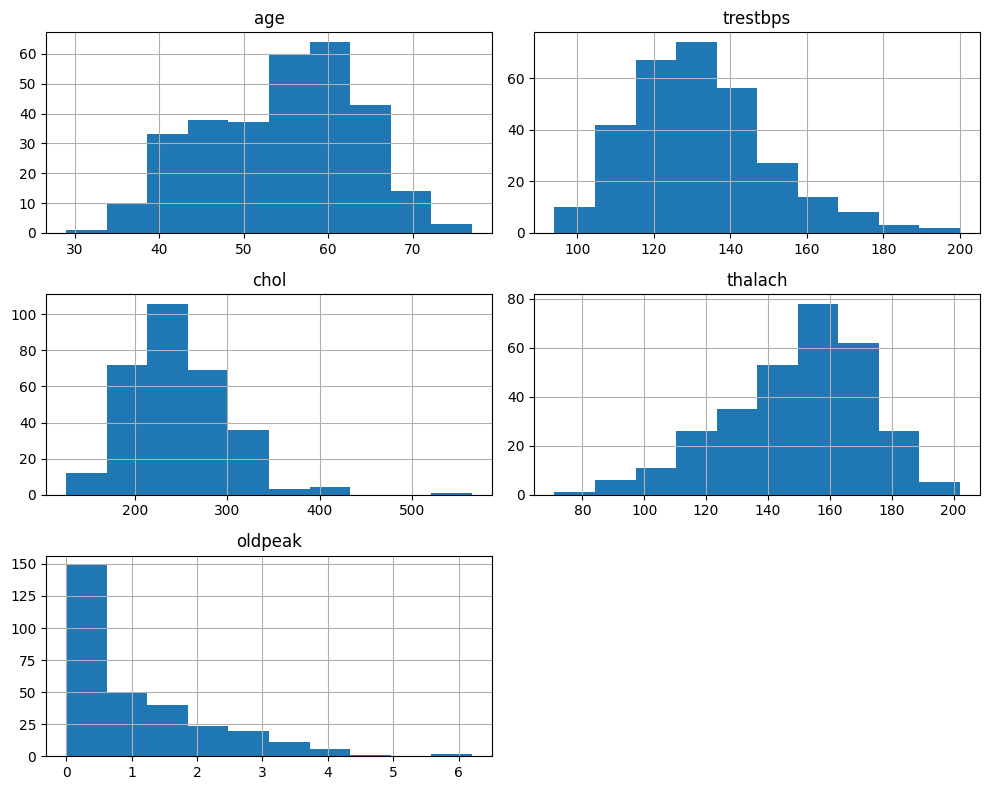

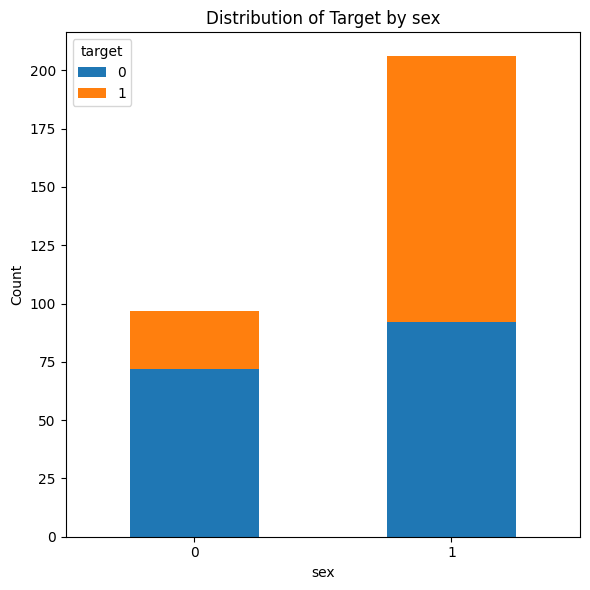

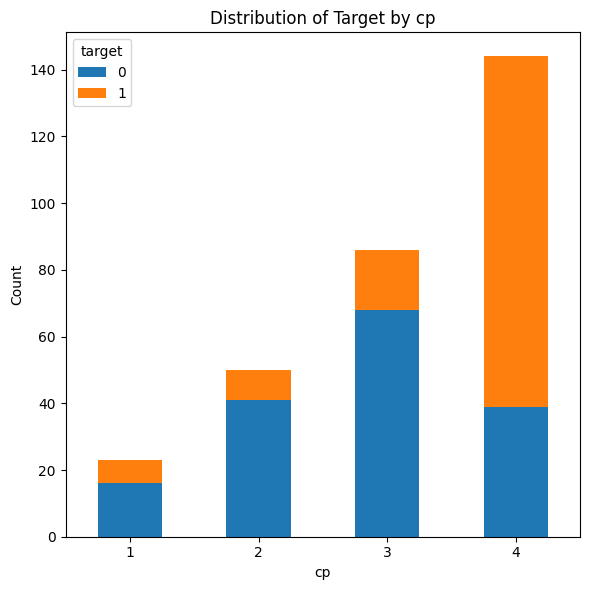

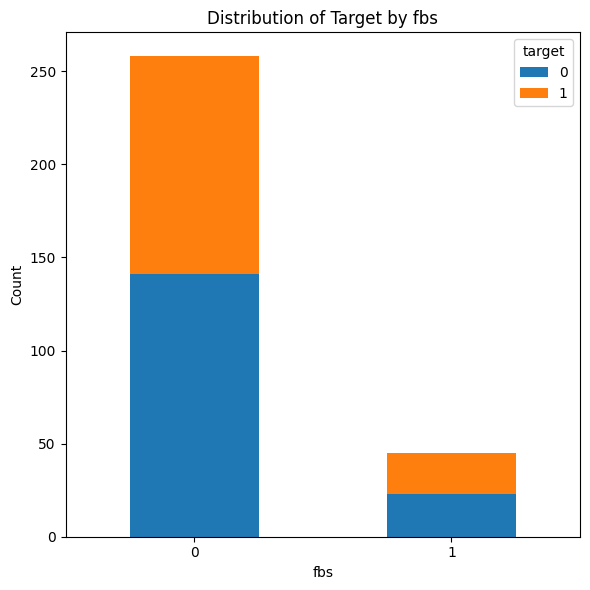

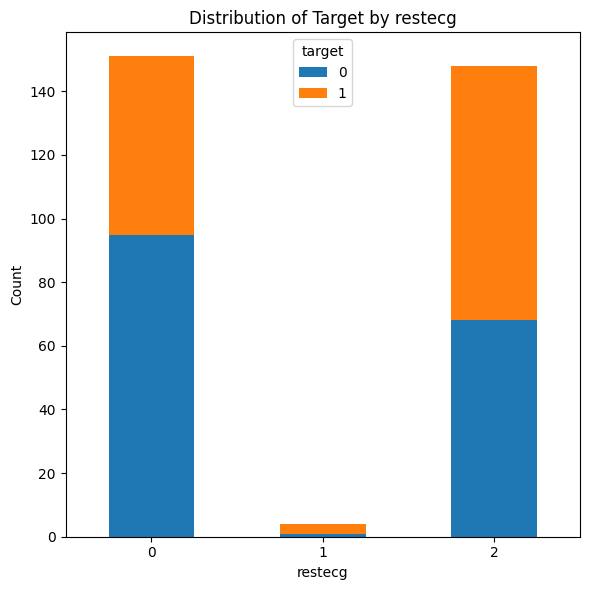

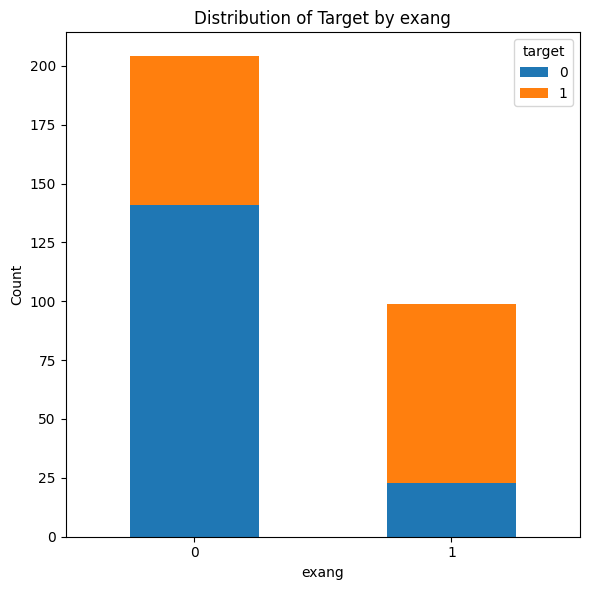

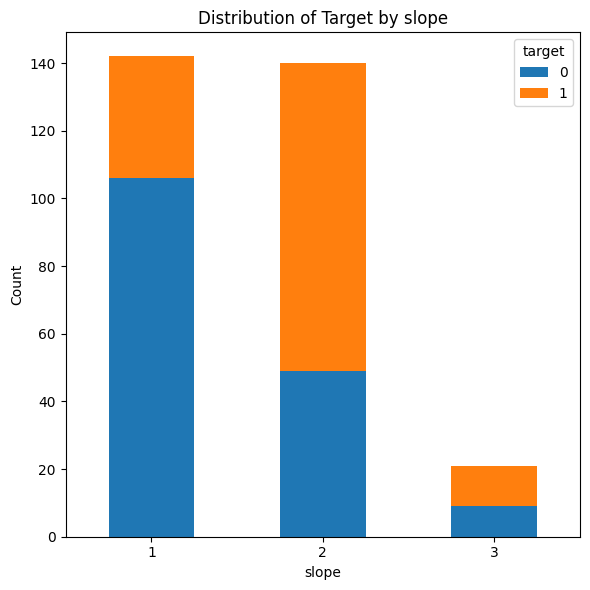

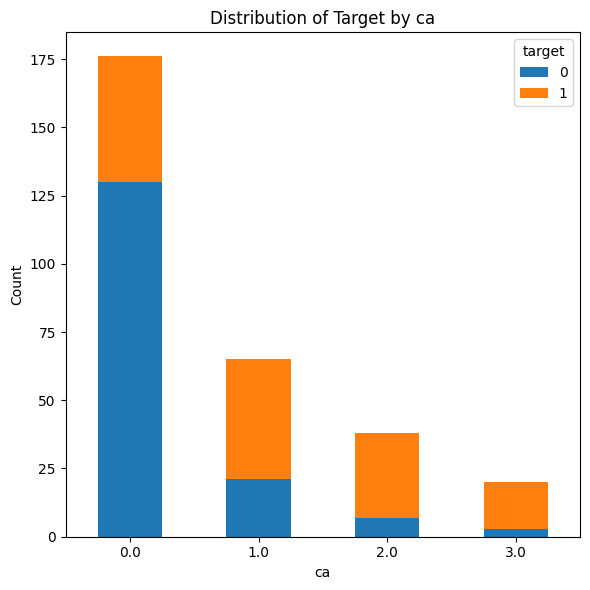

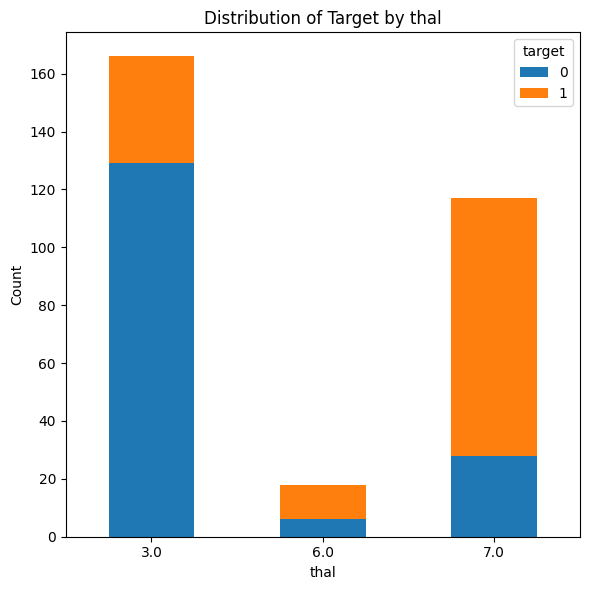

In [ ]:
# basic statistic
display(raw.describe())

# Define numerical, categorical columns before plotting
numeric_cols = ['age','trestbps','chol','thalach','oldpeak']
categorical_cols = ['sex','cp','fbs','restecg','exang','slope','ca','thal']

# Plot histograms for numerical columns
raw[numeric_cols].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Plot count plots for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(6, 6))
    raw.groupby([col, 'target']).size().unstack().plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f'Distribution of Target by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

## 3.Visual Explorations

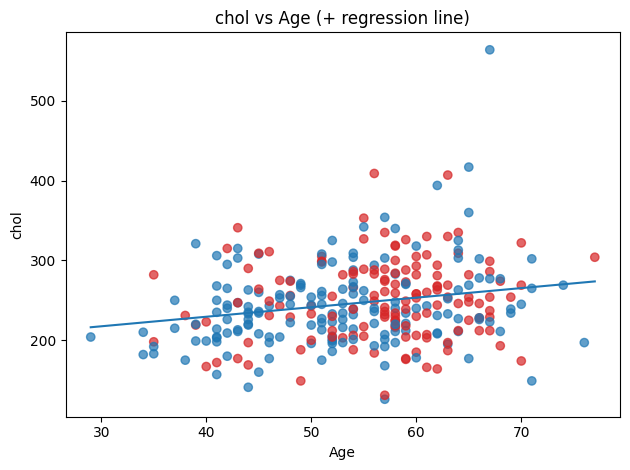

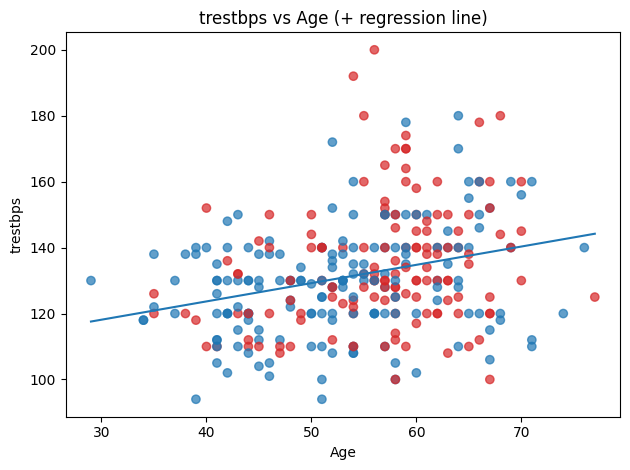

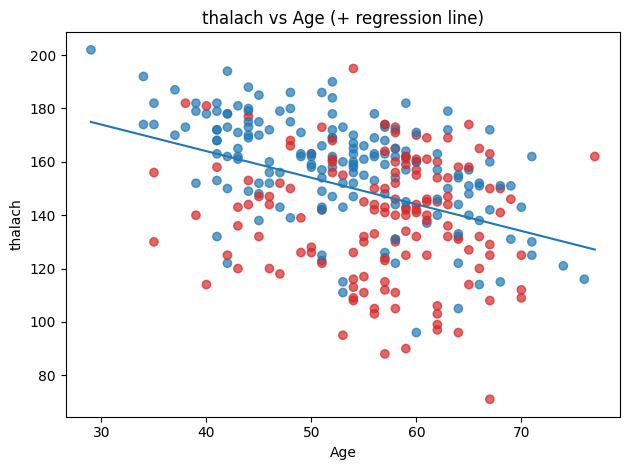

/tmp/ipython-input-882144554.py:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_vals = X.groupby(age_bins)[m].mean()


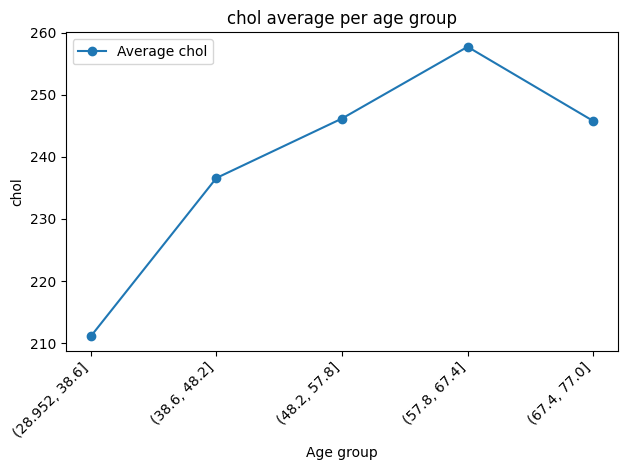

/tmp/ipython-input-882144554.py:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_vals = X.groupby(age_bins)[m].mean()


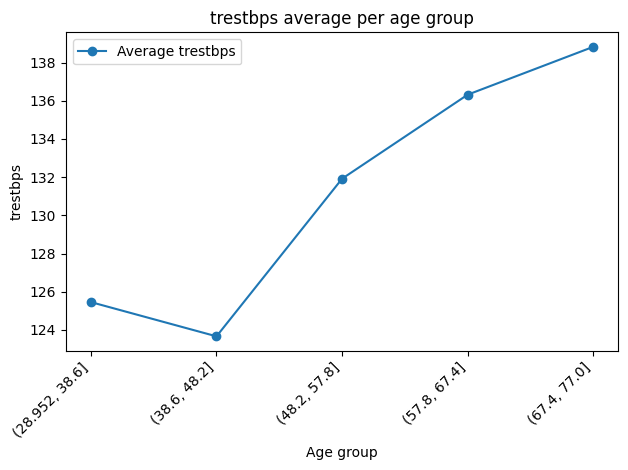

/tmp/ipython-input-882144554.py:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_vals = X.groupby(age_bins)[m].mean()


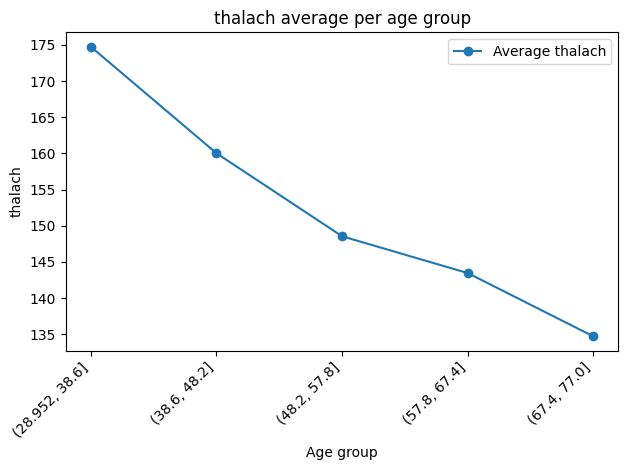

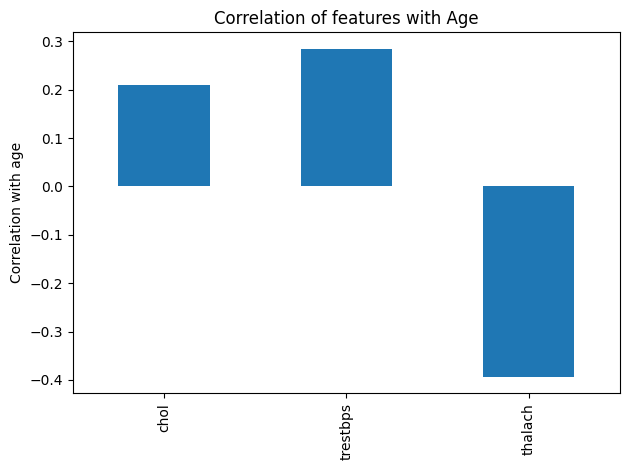

In [ ]:
X = raw.drop(columns=['target'])
y = raw['target']

# Colors by target
colors = ['tab:blue' if t==0 else 'tab:red' for t in y]

def scatter_with_regression(x_series, y_series, x_label, y_label, title):
    # Drop NaNs for fitting
    m = x_series.notna() & y_series.notna()
    x = x_series[m].values.reshape(-1, 1)
    yy = y_series[m].values
    # Fit linear regression
    if len(x) > 1:
        model = LinearRegression()
        model.fit(x, yy)
        # Create line
        x_line = np.linspace(x.min(), x.max(), 100).reshape(-1,1)
        y_pred = model.predict(x_line)
    else:
        x_line, y_pred = None, None

    # Plot scatter
    plt.figure()
    plt.scatter(x_series, y_series, c=colors, alpha=0.7)
    plt.xlabel(x_label); plt.ylabel(y_label)
    plt.title(title)

    # Plot regression line
    if x_line is not None:
        plt.plot(x_line.ravel(), y_pred)
    plt.tight_layout()
    plt.show()

# Scatter + regression for selected pairs
if 'age' in X.columns:
    for col in ['chol', 'trestbps', 'thalach']:
        if col in X.columns:
            scatter_with_regression(X['age'], X[col], 'Age', col, f'{col} vs Age (+ regression line)')

# Group means by age bins
if 'age' in X.columns:
    age_bins = pd.cut(X['age'], bins=5)
    for m in ['chol','trestbps','thalach']:
        if m in X.columns:
            plt.figure()
            avg_vals = X.groupby(age_bins)[m].mean()
            plt.plot(range(len(avg_vals)), avg_vals, marker='o', label=f'Average {m}')
            plt.xticks(range(len(avg_vals)), [str(i) for i in avg_vals.index], rotation=45, ha='right')
            plt.xlabel('Age group'); plt.ylabel(m)
            plt.title(f'{m} average per age group')
            plt.legend(); plt.tight_layout(); plt.show()

# Correlation with age
num_df = X[['age','chol','trestbps','thalach']].copy()
corr = num_df.corr(numeric_only=True)['age'].drop('age')
plt.figure()
corr.plot(kind='bar')
plt.ylabel('Correlation with age')
plt.title('Correlation of features with Age')
plt.tight_layout()
plt.show()

## 4.Data Post-processing

### 4.1 Raw Dataset

In [ ]:
TARGET = 'target'
raw_feature_cols = [c for c in raw.columns if c != TARGET]
K = len(raw_feature_cols)

X_all = raw[raw_feature_cols]
y_all = raw[TARGET]

cat_proc = Pipeline(steps=[
    ###
    ###
])
num_proc = Pipeline(steps=[
    ###
    ###
])
preprocess = ColumnTransformer([
    ###
    ###
])
raw_pipeline = Pipeline([
    ###
])

X_train, X_temp, y_train, y_temp = train_test_split(
    X_all, y_all, test_size=0.2, stratify=y_all, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

X_raw_train = raw_pipeline.fit_transform(X_train, y_train)
X_raw_val = raw_pipeline.transform(X_val)
X_raw_test = raw_pipeline.transform(X_test)

# Get the feature names after preprocessing
preprocessed_feature_names = []
for name, transformer, columns in preprocess.transformers_:
    if hasattr(transformer, 'get_feature_names_out'):
        preprocessed_feature_names.extend(transformer.get_feature_names_out(columns))
    else:
        preprocessed_feature_names.extend(columns)

# Convert NumPy arrays to DataFrames
X_raw_train_df = pd.DataFrame(X_raw_train, columns=preprocessed_feature_names, index=X_train.index)
X_raw_val_df = pd.DataFrame(X_raw_val, columns=preprocessed_feature_names, index=X_val.index)
X_raw_test_df = pd.DataFrame(X_raw_test, columns=preprocessed_feature_names, index=X_test.index)


out_dir = Path('splits'); out_dir.mkdir(parents=True, exist_ok=True)
pd.concat([X_raw_train_df, y_train.rename(TARGET)], axis=1).to_csv(out_dir / 'raw_train.csv', index=False)
pd.concat([X_raw_val_df, y_val.rename(TARGET)], axis=1).to_csv(out_dir / 'raw_val.csv', index=False)
pd.concat([X_raw_test_df, y_test.rename(TARGET)], axis=1).to_csv(out_dir / 'raw_test.csv', index=False)
print("Saved RAW splits. K (RAW features) =", K)

display(X_raw_train_df)
display(X_raw_train_df.isna().sum())

Saved RAW splits. K (RAW features) = 13


,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal
180,-0.729485,-0.395692,0.458139,0.708371,-0.445445,1.0,1.000000,0.0,1.0,0.0,0.5,0.000000,1.0
208,0.050166,-0.054513,0.230598,0.222495,-0.891627,1.0,0.333333,0.0,0.0,0.0,0.0,0.000000,0.0
167,-0.061212,0.059213,0.723605,0.399178,-0.891627,0.0,0.333333,1.0,1.0,1.0,0.0,0.333333,0.0
105,-0.061212,-1.305501,1.121803,0.266666,-0.891627,1.0,0.333333,0.0,0.0,0.0,0.0,0.000000,1.0
297,0.272924,0.514117,-0.167601,-1.190962,-0.713154,0.0,1.000000,0.0,0.0,1.0,0.5,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.829818,0.514117,2.733557,0.310836,0.179210,0.0,1.000000,0.0,1.0,0.0,0.5,0.000000,0.0
136,1.720848,0.798433,-1.438042,-1.102621,1.428521,1.0,1.000000,0.0,0.0,1.0,1.0,0.000000,1.0
2,1.386712,-0.623144,-0.395142,-0.925938,1.428521,1.0,1.000000,0.0,1.0,1.0,0.5,0.666667,1.0
189,1.609469,0.514117,0.078903,-0.175039,0.893102,1.0,0.666667,0.0,1.0,0.0,0.5,1.000000,1.0


,0
age,0
trestbps,0
chol,0
thalach,0
oldpeak,0
sex,0
cp,0
fbs,0
restecg,0
exang,0


### 4.2 Feature Engineering Dataset

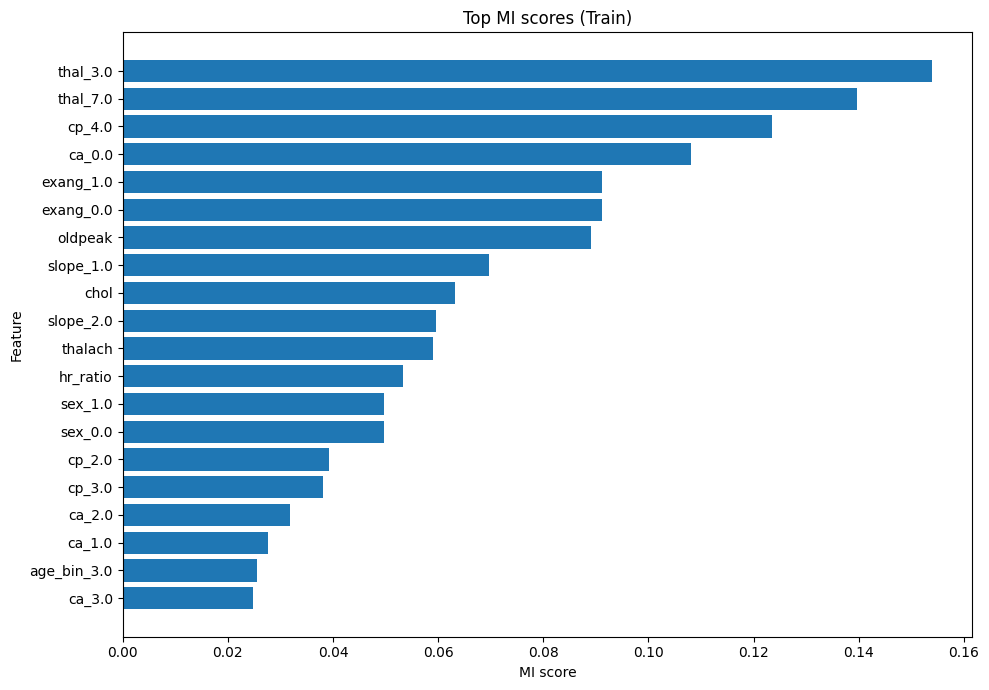

Selected TOP-K engineered features (K = RAW features): 13


,fe_topk_features
0,thal_3.0
1,thal_7.0
2,cp_4.0
3,ca_0.0
4,exang_1.0
5,exang_0.0
6,oldpeak
7,slope_1.0
8,chol
9,slope_2.0


Saved FE splits. K (FE features) = 13


In [ ]:
def add_new_features(Xdf):
    Xdf = Xdf.copy()
    if set(['chol','age']).issubset(Xdf.columns):
        Xdf['chol_per_age'] = Xdf['chol'] / Xdf['age']
    if set(['trestbps','age']).issubset(Xdf.columns):
        Xdf['bps_per_age'] = Xdf['trestbps'] / Xdf['age']
    if set(['thalach','age']).issubset(Xdf.columns):
        Xdf['hr_ratio'] = Xdf['thalach'] / Xdf['age']
    if 'age' in Xdf.columns:
        Xdf['age_bin'] = pd.cut(Xdf['age'], bins=5, labels=False).astype('category')
    return Xdf

generated_cats = ['age_bin']
generated_nums = ['chol_per_age','bps_per_age','hr_ratio']
all_cats = categorical_cols + generated_cats
all_nums = numeric_cols + generated_nums

cat_proc = Pipeline(steps=[
    ###
    ###
])
num_proc = Pipeline(steps=[
    ###
    ###
])

preprocess = ColumnTransformer([
    ###
    ###
])

feature_adder = FunctionTransformer(add_new_features, validate=False)

fe_pipeline = Pipeline([
    ###
    ###
    ###
])

Xt_tr_np = fe_pipeline.fit_transform(X_train, y_train)
Xt_va_np = fe_pipeline.transform(X_val)
Xt_te_np = fe_pipeline.transform(X_test)

ohe = fe_pipeline.named_steps['preprocess'].named_transformers_['cat'].named_steps['onehot']
cat_names = []
for col, cats in zip(all_cats, ohe.categories_):
    for c in cats:
        cat_names.append(f"{col}_{c}")
pre_names = list(all_nums) + cat_names
mask = fe_pipeline.named_steps['var_filter'].get_support()
eng_cols = [name for name, keep in zip(pre_names, mask) if keep]

Xt_tr = pd.DataFrame(Xt_tr_np, columns=eng_cols, index=X_train.index)
Xt_va = pd.DataFrame(Xt_va_np, columns=eng_cols, index=X_val.index)
Xt_te = pd.DataFrame(Xt_te_np, columns=eng_cols, index=X_test.index)

is_discrete = np.array([col.startswith('age_bin_') or any(col.startswith(pfx) for pfx in ['sex_','cp_','fbs_','restecg_','exang_','slope_','ca_','thal_']) for col in Xt_tr.columns], dtype=bool)
mi_scores = mutual_info_classif(Xt_tr.values, y_train.values, discrete_features=is_discrete, random_state=42)
mi_series = pd.Series(mi_scores, index=Xt_tr.columns).sort_values(ascending=False)

# Visualize Top MI
topN = int(min(20, len(mi_series)))
top_mi = mi_series.head(topN).iloc[::-1]
plt.figure(figsize=(10, max(6, 0.35*topN)))
plt.barh(top_mi.index, top_mi.values)
plt.title('Top MI scores (Train)')
plt.xlabel('MI score'); plt.ylabel('Feature')
plt.tight_layout(); plt.show()

K = len([c for c in raw.columns if c != 'target'])
topk_cols = list(mi_series.head(K).index)
print("Selected TOP-K engineered features (K = RAW features):", K)
display(pd.Series(topk_cols, name="fe_topk_features").reset_index(drop=True))

fe_tr = Xt_tr[topk_cols].copy()
fe_tr['target'] = y_train.values
fe_va = Xt_va[topk_cols].copy()
fe_va['target'] = y_val.values
fe_te = Xt_te[topk_cols].copy()
fe_te['target'] = y_test.values

out_dir = Path('splits')
out_dir.mkdir(parents=True, exist_ok=True)
fe_tr.to_csv(out_dir / 'fe_train.csv', index=False)
fe_va.to_csv(out_dir / 'fe_val.csv', index=False)
fe_te.to_csv(out_dir / 'fe_test.csv', index=False)

print("Saved FE splits. K (FE features) =", K)

In [ ]:
display(fe_tr.head())
display(fe_tr.isna().sum())

,thal_3.0,thal_7.0,cp_4.0,ca_0.0,exang_1.0,exang_0.0,oldpeak,slope_1.0,chol,slope_2.0,thalach,hr_ratio,sex_1.0,target
180,0.0,1.0,1.0,1.0,0.0,1.0,-0.445445,0.0,0.458139,1.0,0.708371,0.726265,1.0,1
208,1.0,0.0,0.0,1.0,0.0,1.0,-0.891627,1.0,0.230598,0.0,0.222495,-0.054469,1.0,0
167,1.0,0.0,0.0,0.0,1.0,0.0,-0.891627,1.0,0.723605,0.0,0.399178,0.099522,0.0,0
105,0.0,1.0,0.0,1.0,0.0,1.0,-0.891627,1.0,1.121803,0.0,0.266666,0.031766,1.0,0
297,0.0,1.0,1.0,1.0,1.0,0.0,-0.713154,0.0,-0.167601,1.0,-1.190962,-0.859761,0.0,1


,0
thal_3.0,0
thal_7.0,0
cp_4.0,0
ca_0.0,0
exang_1.0,0
exang_0.0,0
oldpeak,0
slope_1.0,0
chol,0
slope_2.0,0


In [ ]:
# zip folder
!zip -r dataset.zip splits

  adding: splits/ (stored 0%)
  adding: splits/fe_train.csv (deflated 74%)
  adding: splits/raw_test.csv (deflated 67%)
  adding: splits/raw_val.csv (deflated 67%)
  adding: splits/fe_test.csv (deflated 64%)
  adding: splits/fe_val.csv (deflated 64%)
  adding: splits/raw_train.csv (deflated 81%)
